# Linear Regression Model

In [1]:
import pandas as pd
df =pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df = df.iloc[:,1:]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


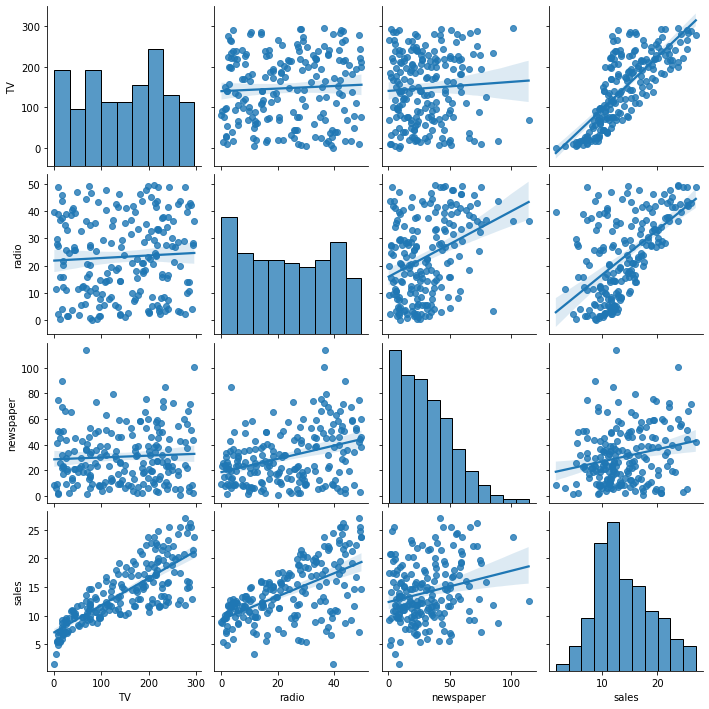

In [7]:
import seaborn as sns
sns.pairplot(df, kind = 'reg');

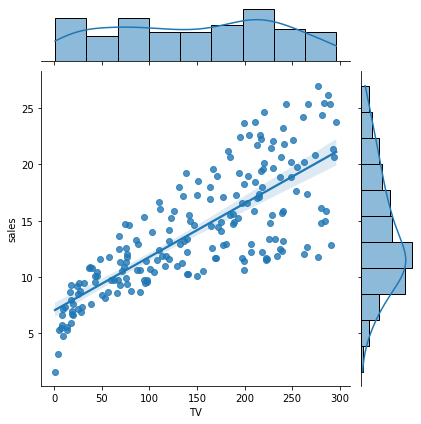

In [8]:
sns.jointplot(x='TV', y= 'sales', data=df, kind = 'reg');

#burda degiskenleri tanimak istiyoruz 

### Statsmodels ile modelleme ve ciktilari yorumlama

In [18]:
X = df[['TV']]   #burda bir daha köseli koymasinin sebebi,ciktinin tablo seklinde gözükmesi icin
X[0:5]           #köseliyi silip, calistirinca asagidaki islemlerde bir desiklk olmadi

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [19]:
X = sm.add_constant(X)  #matris isleminin yapilmasi icin ekledik,cünkü kendisi sadece 1 sütundu 
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [20]:
y= df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [43]:
import statsmodels.api as sm
lm = sm.OLS(y,X)   #model kurduk,sklearn'de istatiki aciklamalar verilmedigi icin böyle yaptik
model = lm.fit()
model.summary()

#bu tüm degiskenleri gösterecek yazim sekli

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        10:12:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#cons-coef kesisiminde,yani ortalma satistir,diger degiskenlerin etki etmedigi zamanki
#TV-coef TV verilen 1 birimlik artista satilar bu kadar artiyor

In [25]:
import statsmodels.formula.api as smf 
lm = smf.ols('sales ~ TV', df)
model = lm.fit()
model.summary()

#burdada istedigin degiskenleri secerek bu tabloyu aliyorsun

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        10:11:54   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [44]:
print('Sales= '+ str( '%.2f' %model.params[0])+' + ' + 'TV*'+ str( '%.2f' %model.params[1]))

#simdi bunun denklemini yazayim

Sales= 7.03 + TV*0.05


In [45]:
model.summary().tables[1]
#bu yukarida ki tablo 3 kisimdan olusuyor,eger orta kismi görmek icin[1] yazdik

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [29]:
model.conf_int()

#sadece modelin güven araliklarini görmek istersen

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [30]:
print(model.f_pvalue)

print('f_pvalue: ','%.4f' %model.f_pvalue)   #buda e den kurtulmak icin

#e-42 10 üzeri eksi 42 demek

1.467389700194647e-42
f_pvalue:  0.0000


In [31]:
print('fvalue: ','%.2f' %model.fvalue)    

fvalue:  312.14


In [32]:
print('tvalue: ','%.2f' %model.tvalues[0:1])    #fvalue ,modelin anlamliligi 

tvalue:  15.36


In [33]:
 model.mse_model  #bu sayi bunun icin cok korkunc dedi

3314.618166868649

In [34]:
model.rsquared   #Rkare degeri

0.611875050850071

In [35]:
model.rsquared_adj   #Adjusted R squared 

0.6099148238341623

In [36]:
model.fittedvalues[0:5] #modelin tahmin ettgi degerler ,sklearn'de predict ile yapiyorduk ama burda farkli

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [37]:
y[0:5]   #gercek y degerleri

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [38]:
print('Satis = ' + str('%.2f' %model.params[0])+ ' + ' + 'TV*'+ str('%.2f'% model.params[1]))

Satis = 7.03 + TV*0.05


/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


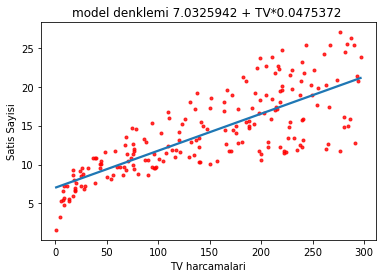

In [52]:
g= sns.regplot(df['TV'],df['sales'], ci=None, scatter_kws= {'color':'r','s':9})
g.set_title('model denklemi 7.0325942 + TV*0.0475372 ')
g.set_xlabel('TV harcamalari')
g.set_ylabel('Satis Sayisi');

#### bunlari birde Sklearn ile yapialim

In [54]:
from sklearn.linear_model import LinearRegression
X = df[['TV']]    #modeli bir sütunla kurdum,birtane daha köseli koymayinca hata verdi "2D required dedi"
y = df['sales']
reg = LinearRegression()
model = reg.fit(X,y)
model


#summary diye bir özelligi yok

LinearRegression()

In [55]:
model.intercept_   #bunlarla yukaridaki denklemi alabiliyoruz

7.0325935491276965

In [56]:
model.coef_

array([0.04753664])

In [57]:
model.predict([[30]])

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276])

In [60]:
model.predict([[30],[40]])

/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([8.45869276, 8.93405917])

## Residual (re-zii-cuuııl)  .gercek ve hata arasındakı fark

In [70]:
from sklearn.metrics import mean_squared_error, r2_score

model = smf.ols('sales ~ TV', df)
model = model.fit()

In [71]:
mse = mean_squared_error(y, model.fittedvalues)
mse

10.512652915656757

In [74]:
import numpy as np
rmse =  np.sqrt(mse)  # root mean squared error
rmse

3.2423221486546887

In [85]:
X_pred = model.predict(X)[:10]   #X Tv sütunu 199 deger var icinde  

In [88]:
X_pred

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
5     7.446162
6     9.765950
7    12.746498
8     7.441409
9    16.530414
dtype: float64

In [86]:
y[:10]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
5     7.2
6    11.8
7    13.2
8     4.8
9    10.6
Name: sales, dtype: float64

In [92]:
k_t = pd.DataFrame({'tahmin Degerleri': X_pred[0:10], 'Gercek Degerler': y[0:10]})

In [93]:
k_t

,tahmin Degerleri,Gercek Degerler
0,17.970775,22.1
1,9.147974,10.4
2,7.850224,9.3
3,14.234395,18.5
4,15.627218,12.9
5,7.446162,7.2
6,9.765950,11.8
7,12.746498,13.2
8,7.441409,4.8
9,16.530414,10.6


In [94]:
k_t['hata_miktari'] = k_t['Gercek Degerler'] - k_t['tahmin Degerleri']

In [96]:
k_t

,tahmin Degerleri,Gercek Degerler,hata_miktari
0,17.970775,22.1,4.129225
1,9.147974,10.4,1.252026
2,7.850224,9.3,1.449776
3,14.234395,18.5,4.265605
4,15.627218,12.9,-2.727218
5,7.446162,7.2,-0.246162
6,9.765950,11.8,2.034050
7,12.746498,13.2,0.453502
8,7.441409,4.8,-2.641409
9,16.530414,10.6,-5.930414


In [97]:
k_t['Hata_karaler'] = k_t['hata_miktari']**2
k_t

,tahmin Degerleri,Gercek Degerler,hata_miktari,Hata_karaler
0,17.970775,22.1,4.129225,17.050503
1,9.147974,10.4,1.252026,1.567569
2,7.850224,9.3,1.449776,2.101851
3,14.234395,18.5,4.265605,18.195390
4,15.627218,12.9,-2.727218,7.437719
5,7.446162,7.2,-0.246162,0.060596
6,9.765950,11.8,2.034050,4.137358
7,12.746498,13.2,0.453502,0.205664
8,7.441409,4.8,-2.641409,6.977040
9,16.530414,10.6,-5.930414,35.169814


In [101]:
np.sum(k_t['Hata_karaler'])  #toplam hata

92.90350329638103

In [102]:
np.mean(k_t['Hata_karaler'])   #ortalama hatalari

9.290350329638104

In [104]:
np.sqrt(np.mean(k_t['Hata_karaler']))

3.0480075999967755

In [106]:
model.resid[:10]

0    4.129225
1    1.252026
2    1.449776
3    4.265605
4   -2.727218
5   -0.246162
6    2.034050
7    0.453502
8   -2.641409
9   -5.930414
dtype: float64

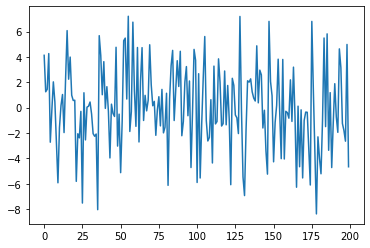

In [109]:
import matplotlib.pyplot as plt
plt.plot(model.resid);          #hatalarin gözlemlenmesi,bu gözlem degerlerine gidip bakmak gerekir

In [110]:
df    #Adversiting veris seti

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [111]:
X = df.drop('sales', axis=1)
y = df['sales']